#             Creating A Social Network Graph Based On Movie Scripts

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

## Part 1: Text Parsing

### Load file and convert to raw text:

In [3]:
file = open("Shrek_2.txt", encoding = "UTF-8")
#file = open("Shrek_2_v2.txt", encoding = "UTF-8")

In [4]:
raw_text = ""

for x in file:
    raw_text += x
    
raw_text = raw_text.split("\n")

file.close()

In [87]:
raw_text[1:10]

['',
 '1',
 '',
 'INT. CASTLE INTERIOR',
 'There is a bed onstage behind a silky curtain, backlit.',
 'PRINCE CHARMING (OS)',
 'Once upon a time in a kingdom far,',
 'far away, the king and queen were',
 'blessed with a beautiful baby girl.']

### Extracting list of characters:

In many scripts, characters are denoted by capital letters

In [6]:
characters = []

for x in raw_text:
    if x.isupper() and " " not in x:
        if x not in characters:
            characters.append(x)

In [7]:
characters

['WOLF',
 'CHARMING',
 'SHREK',
 'DONKEY',
 'FIONA',
 'MESSENGER',
 'GINGY',
 'PINOCHIO',
 'KING',
 'QUEEN',
 'FG',
 'FC',
 'VOICE',
 'PUSS',
 'KYLE',
 'CEDRIC',
 'SISTER',
 'GUARD',
 'AUDIENCE',
 'UEEN',
 'FANFARE']

In [8]:
characters.remove("UEEN")
characters.remove("AUDIENCE")
characters.remove("FANFARE")
characters.remove("VOICE")

In [9]:
characters

['WOLF',
 'CHARMING',
 'SHREK',
 'DONKEY',
 'FIONA',
 'MESSENGER',
 'GINGY',
 'PINOCHIO',
 'KING',
 'QUEEN',
 'FG',
 'FC',
 'PUSS',
 'KYLE',
 'CEDRIC',
 'SISTER',
 'GUARD']

### Breaking Down Script Into Scenes:

Similar to how a script denotes characters, scenes are often formatted in capital letters with INT or EXT (interior or exterior) and the setting of the scene.

In [10]:
scenes = []

scene = []
for x in raw_text:
    if  "EXT." in x or "INT." in x:
        scenes.append(scene)
        scene = []
    else:
        scene.append(x)

In [88]:
scenes[1]

['There is a bed onstage behind a silky curtain, backlit.',
 'PRINCE CHARMING (OS)',
 'Once upon a time in a kingdom far,',
 'far away, the king and queen were',
 'blessed with a beautiful baby girl.',
 'And throughout the land, everyone',
 'was happy... until the sun went down',
 'and they saw that their daughter was',
 'cursed with a frightful enchantment',
 'that took hold each and every night.',
 'Desperate, they sought the help of a',
 'fairy godmother who had them lock',
 'the young princess away in a tower,',
 'there to await the kiss... of the',
 'handsome Prince Charming.',
 '(enters gallantly onstage)',
 'It was he who would chance the',
 'perilous journey through blistering',
 'cold and scorching desert traveling',
 'for many days and nights, risking',
 "life and limb to reach the Dragon's",
 'keep. For he was the bravest, and',
 'most handsome... in all the land.',
 '(looks at the audience)',
 'And it was destiny that his kiss',
 'would break the dreaded curse. He',
 'alone

### Extracting Characters In Scenes:

In [12]:
scenes_characters = []

for scene in scenes:
    scene_characters = []
    
    for line in scene:
        if line in characters and line not in scene_characters:
            scene_characters.append(line)
    scenes_characters.append(scene_characters)

In [13]:
df = pd.DataFrame(scenes_characters)

In [14]:
df

,0,1,2,3,4,5,6,7,8
0,None,None,None,None,None,None,None,None,None
1,WOLF,CHARMING,None,None,None,None,None,None,None
2,SHREK,DONKEY,FIONA,MESSENGER,None,None,None,None,None
3,GINGY,PINOCHIO,DONKEY,SHREK,FIONA,None,None,None,None
4,MESSENGER,FIONA,KING,SHREK,QUEEN,DONKEY,None,None,None
5,FG,FIONA,SHREK,DONKEY,None,None,None,None,None
6,KING,QUEEN,FG,FC,CHARMING,None,None,None,None
7,KING,None,None,None,None,None,None,None,None
8,KING,SHREK,None,None,None,None,None,None,None
9,SHREK,DONKEY,PUSS,KYLE,FG,CHARMING,None,None,None


### Assigning character relationships weights:

The weight of each character relationship (line weight) is detirmined by how many times they appear in a scene together.

In [80]:
weights = {}

for x in characters:
    for y in characters:
        weight = 0
        for z in range(df.T.shape[1]):
            if x in df.T[z].values and y in df.T[z].values:
                weight += 1
        weights[(x,y)] = weight / 5

In [94]:
weights[("WOLF", "CHARMING")]

0.2

## Part 2: Using NetworkX to create a Social Web:

### Adding nodes and edges:

In [129]:
G = nx.Graph()

G.add_nodes_from(characters, node_size = node_sizes)

for x in range(df.shape[0]):
    for y in range(df.shape[1]):
        for z in range(df.shape[1]):
            if df.iloc[x,y] != None and df.iloc[x,z] != None:
                G.add_edge(df.iloc[x,y], df.iloc[x,z], width = weights[df.iloc[x,y], df.iloc[x,z]])

### Setting the positions of nodes and labels:

In [171]:
pos = {}
r = 3
theta = 2

for x in characters:
    x_coor = r * math.cos(theta)
    y_coor = r * math.sin(theta)
    
    pos[x] = (x_coor, y_coor)
    theta += .5
    
# doing the same thing for the labels separately:
label_pos = {}
r = 3.2
theta = 2

for x in characters:
    x_coor = r * math.cos(theta)
    y_coor = r * math.sin(theta)
    
    label_pos[x] = (x_coor, y_coor)
    theta += .5

In [172]:
pos

{'WOLF': (-1.2484405096414273, 2.727892280477045),
 'CHARMING': (-2.403430846640801, 1.7954164323118693),
 'SHREK': (-2.9699774898013365, 0.4233600241796016),
 'DONKEY': (-2.809370061872389, -1.0523496830688595),
 'FIONA': (-1.960930862590836, -2.2704074859237844),
 'MESSENGER': (-0.6323873982923391, -2.932590352995291),
 'GINGY': (0.8509865563896788, -2.8767728239894153),
 'PINOCHIO': (2.12600932287378, -2.1166209767111757),
 'KING': (2.880510859951098, -0.8382464945967776),
 'QUEEN': (2.9297628771840705, 0.6453599642634466),
 'FG': (2.2617067630299137, 1.9709597961563672),
 'FC': (1.0399059535050774, 2.8139999303242167),
 'PUSS': (-0.4365001014258406, 2.9680747398701453),
 'KYLE': (-1.806035708054471, 2.3954613378704708),
 'CEDRIC': (-2.7333907856540307, 1.2363554557252698),
 'SISTER': (-2.9915164685891353, -0.2254533613854279),
 'GUARD': (-2.517214587229357, -1.6320633326681093)}

### Using our weights to set node size and line weight:

In [177]:
widths = list(nx.get_edge_attributes(G,'width').values())

node_sizes = []
for x in characters:
    node_size = 0
    for y in characters:
         node_size += weights[(x,y)]
    node_sizes.append(node_size * 125)

### Plotting the graph:

{'WOLF': Text(-1.3316698769508557, 2.9097517658421816, 'WOLF'),
 'CHARMING': Text(-2.563659569750188, 1.9151108611326606, 'CHARMING'),
 'SHREK': Text(-3.1679759891214254, 0.4515840257915751, 'SHREK'),
 'DONKEY': Text(-2.9966613993305486, -1.1225063286067836, 'DONKEY'),
 'FIONA': Text(-2.091659586763558, -2.4217679849853706, 'FIONA'),
 'MESSENGER': Text(-0.6745465581784951, -3.1280963765283105, 'MESSENGER'),
 'GINGY': Text(0.907718993482324, -3.0685576789220432, 'GINGY'),
 'PINOCHIO': Text(2.267743277732032, -2.2577290418252542, 'PINOCHIO'),
 'KING': Text(3.072544917281171, -0.8941295942365628, 'KING'),
 'QUEEN': Text(3.1250804023296754, 0.6883839618810097, 'QUEEN'),
 'FG': Text(2.412487213898575, 2.102357115900125, 'FG'),
 'FC': Text(1.1092330170720828, 3.0015999256791646, 'FC'),
 'PUSS': Text(-0.46560010818756337, 3.165946389194822, 'PUSS'),
 'KYLE': Text(-1.9264380885914356, 2.555158760395169, 'KYLE'),
 'CEDRIC': Text(-2.9156168380309664, 1.3187791527736212, 'CEDRIC'),
 'SISTER': Tex

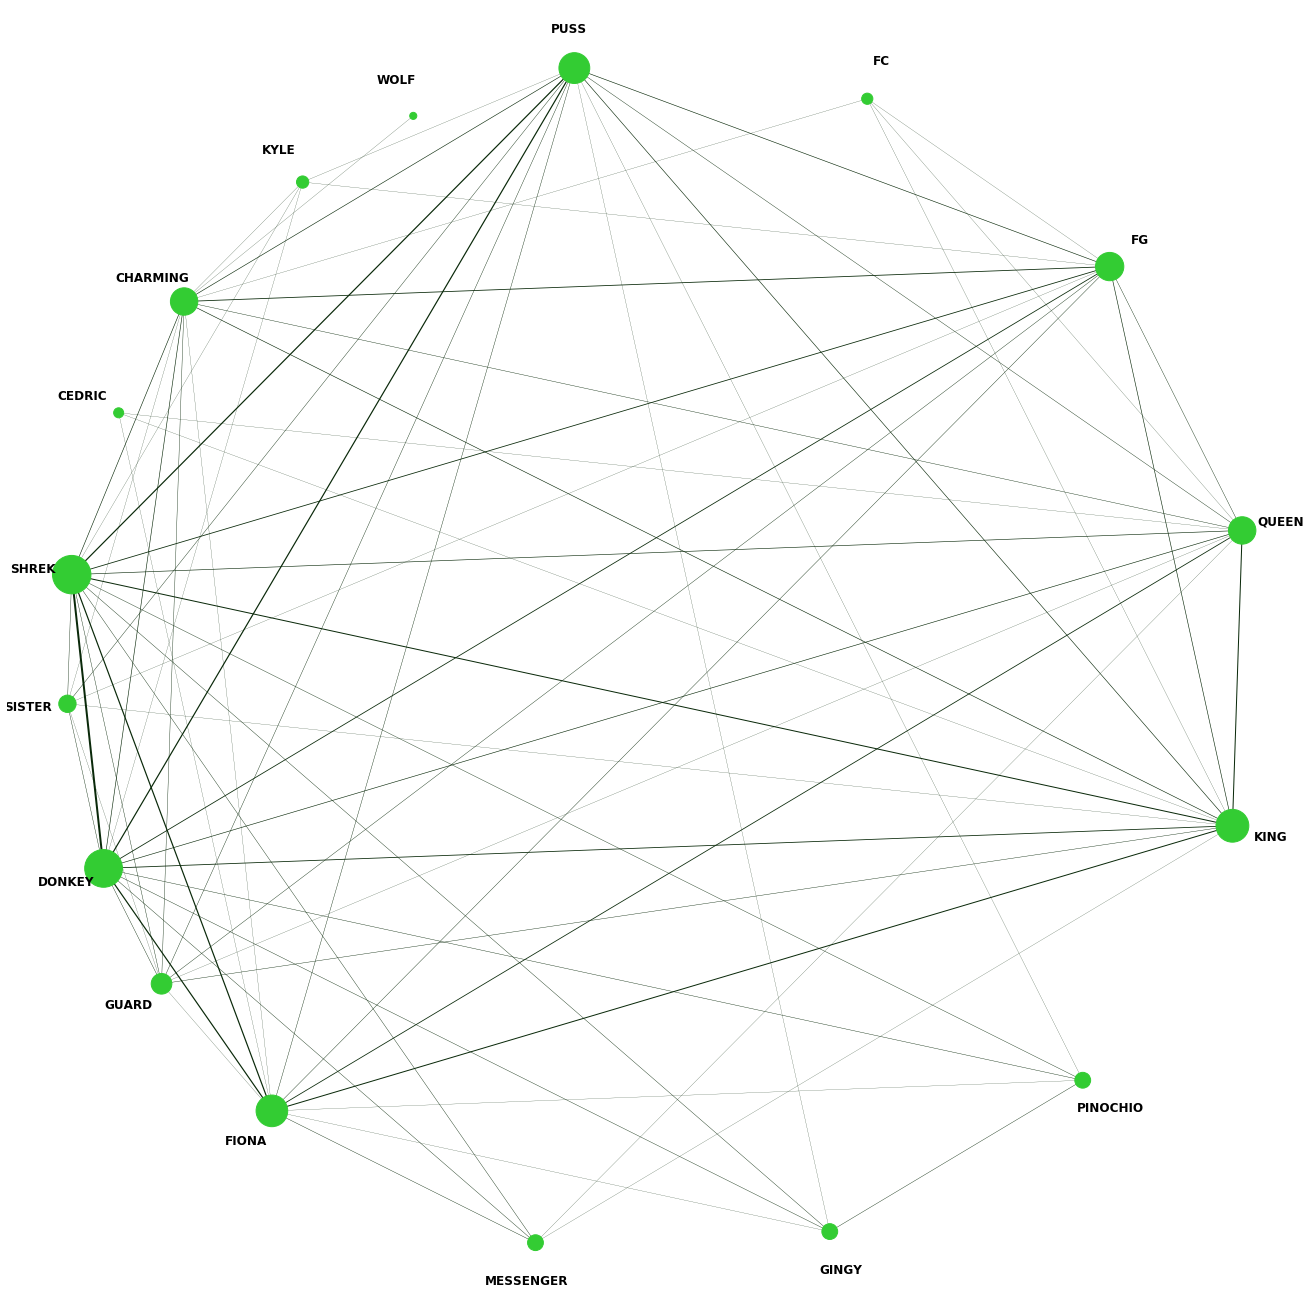

In [181]:
plt.figure(figsize=(18,18))
nx.draw(G, pos, font_size = 32, width = widths, node_color = '#33cc33', edge_color = "#0a290a", node_size = node_sizes)
nx.draw_networkx_labels(G, label_pos, font_weight = "bold")